# Shadow denoising

In [1]:
# importing necessary libraries
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib as mpl

Text(0.5, 1.0, 'B')

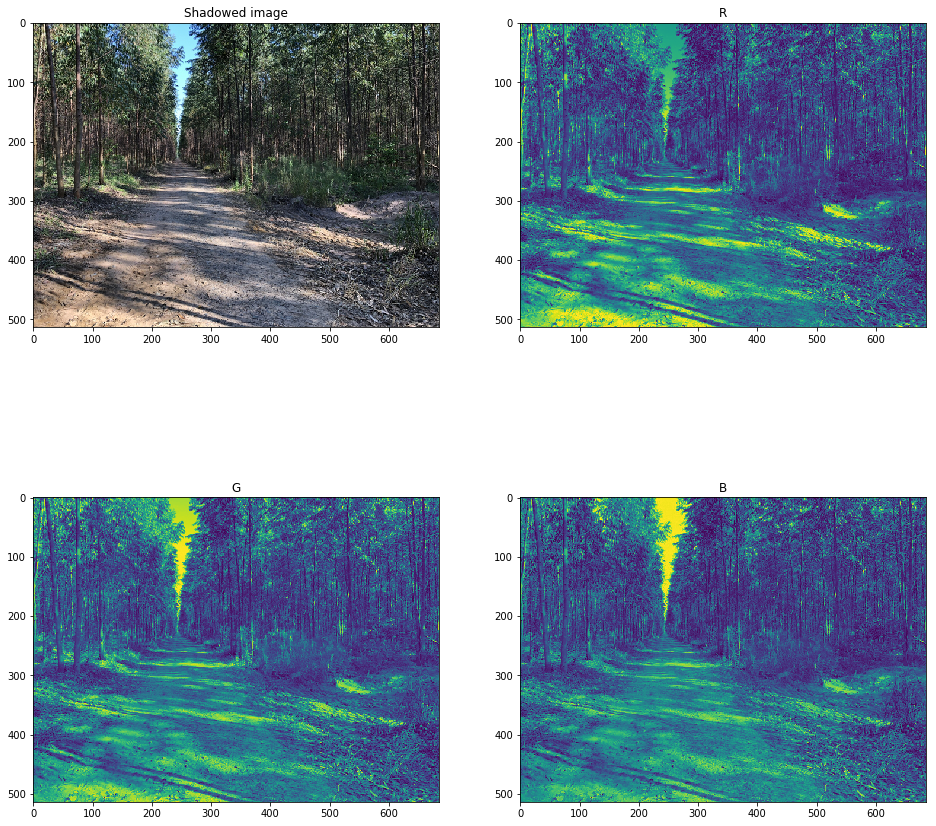

In [2]:
I = imageio.imread("../images/shadowE.jpg")
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(I)
plt.title("Shadowed image")
plt.subplot(222)
plt.imshow(I[:,:,0])
plt.title("R")
plt.subplot(223)
plt.imshow(I[:,:,1])
plt.title("G")
plt.subplot(224)
plt.imshow(I[:,:,2])
plt.title("B")

In [4]:
def range_adjustment(img, minvalue=0, maxvalue=255):
    currmin = np.min(img)
    currmax = np.max(img)
    
    img_u8 = np.zeros(img.shape, dtype=np.uint8)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img_u8[x,y] = ((img[x,y]-currmin)*(maxvalue - minvalue)//(currmax - currmin)) + minvalue
    
    return img_u8    

Text(0.5, 1.0, 'V')

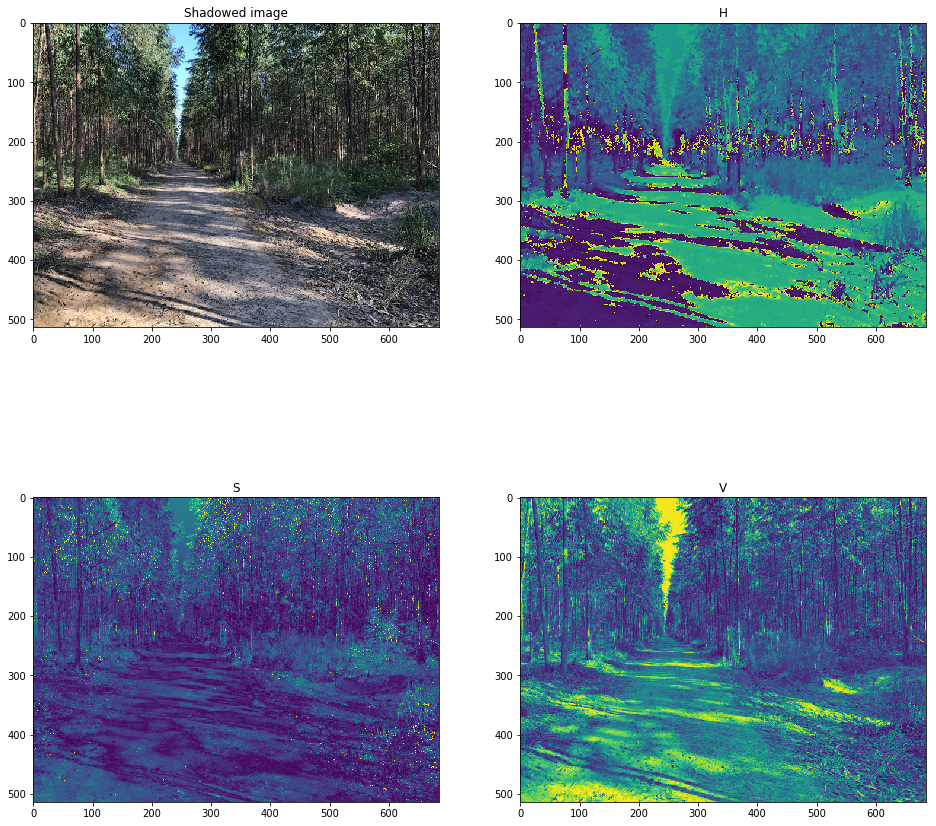

In [5]:
I_hsv = mpl.colors.rgb_to_hsv(I)
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(I)
plt.title("Shadowed image")
plt.subplot(222)
plt.imshow(range_adjustment(I_hsv[:,:,0],0,255))
plt.title("H")
plt.subplot(223)
plt.imshow(range_adjustment(I_hsv[:,:,1],0,255))
plt.title("S")
plt.subplot(224)
plt.imshow(range_adjustment(I_hsv[:,:,2],0,255))
plt.title("V")

In [6]:
def limiarization(img, thr = 0.5):
    threshold = thr * np.max(img)
    mask = np.zeros(img.shape, dtype = np.uint8)
    mask[np.where(img < threshold)] = 1
    return mask

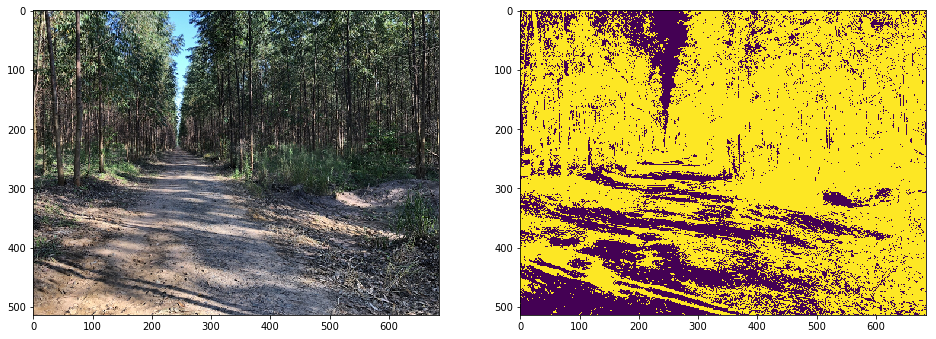

In [15]:
shadow_mask = limiarization(I_hsv[:,:,2],0.47)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(shadow_mask)

In [ ]:
def histogram(img, range_values):
    # gets dimension of input image
    N, M = A.shape
    
    # creates an empty histogram array with size proportional to the number of pixel values 
    histogram = np.zeros(range_values).astype(int)

    # count every quantity of every value present in image
    for i in range(range_values):
        # locate all pixels with value i in a vector
        pix_i_values = np.where(img == i)
        
        # get quantity of pixels by the previous vector array length
        histogram[i] = pix_i_values[0].shape[0]
            
    return histogram

(array([107696,  22046,  35681,  39446,  36902,  32192,  28578,  24165,
        16457,   8927]), array([  0. ,  11.9,  23.8,  35.7,  47.6,  59.5,  71.4,  83.3,  95.2,
       107.1, 119. ]))


([array([291.,   5.,   8.,  19.,  35.,  35.,  33.,  24.,  30.,  34.]),
  array([281.,   6.,   9.,  13.,  34.,  30.,  40.,  32.,  35.,  34.]),
  array([311.,  12.,  17.,  25.,  19.,  27.,  30.,  31.,  21.,  21.]),
  array([293.,   7.,  24.,  28.,  26.,  26.,  30.,  32.,  25.,  23.]),
  array([265.,  11.,  31.,  26.,  30.,  24.,  35.,  30.,  27.,  35.]),
  array([221.,  22.,  31.,  30.,  36.,  40.,  33.,  30.,  43.,  28.]),
  array([236.,   9.,  23.,  40.,  42.,  28.,  38.,  29.,  37.,  32.]),
  array([230.,   7.,  14.,  37.,  36.,  39.,  35.,  38.,  40.,  38.]),
  array([221.,   8.,  19.,  37.,  41.,  42.,  48.,  38.,  41.,  19.]),
  array([208.,   9.,  19.,  40.,  48.,  45.,  48.,  41.,  28.,  28.]),
  array([208.,   6.,  26.,  42.,  51.,  39.,  35.,  38.,  34.,  35.]),
  array([198.,  11.,  33.,  53.,  59.,  43.,  29.,  31.,  35.,  22.]),
  array([192.,  18.,  33.,  58.,  49.,  42.,  32.,  35.,  28.,  27.]),
  array([200.,  21.,  31.,  36.,  42.,  39.,  35.,  44.,  43.,  23.]),
  arra

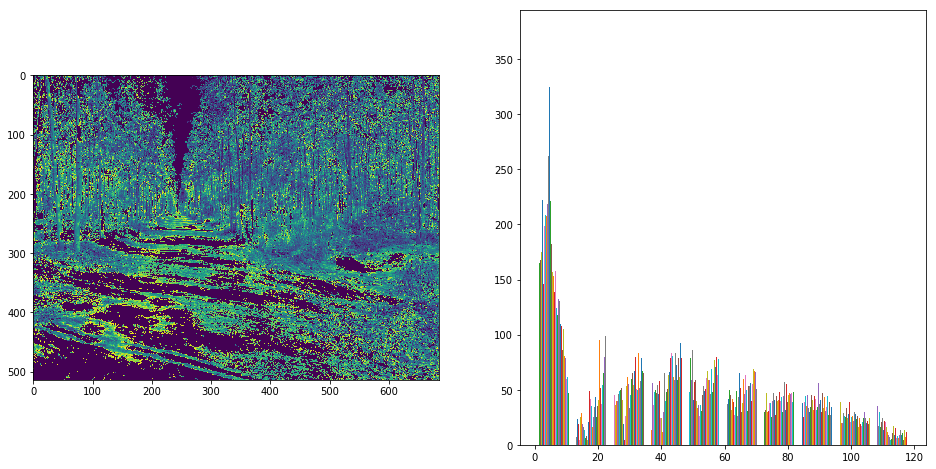

In [22]:
Rshadow = shadow_mask*I[:,:,0]
Rshadow_histogram = np.histogram(Rshadow)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(Rshadow)
plt.subplot(122)
plt.hist(Rshadow)